<a href="https://colab.research.google.com/github/lillianpoland/hi-class/blob/main/LillPolaU9Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 9 Project: Your first neural network

**Task**:

Two parts:

1. Get a data set approved by your instructor (me). It must have either: three or more variables OR a sufficiently complicated relationship between two of the variables.

2. Create, analyze, and present a multi-layer non-linear neural network using the python programming language. Remember that visualizing your model is part of analyzing it.


##Context
Facebook used to be an extremely relevant social media platform. However, it has declined in popularity as Instagram and Tik Tok have risen. I find the stats of posts and inetractions from friends/family very interesting. This data set from UC Irvine shows the stats of likes, comments, shares, interactions, and more information regarding posts and facebook accounts. I can assume that likes, comments, and shares will have an upward trend effect on total interactions, because it makes logical sense that more likes, comments, and shares will be the cause of more interaction.

In [3]:
!pip install pymc-bart
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.1 MB/s eta 0:00:00


In [4]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
Fb = pd.read_csv('https://raw.githubusercontent.com/lillianpoland/hi-class/refs/heads/main/dataset_Facebook.csv').dropna()

In [6]:
Fb

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,Photo,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


In [7]:
Interactions = Fb[["like","comment","share"]]

In [8]:
Interactions

,like,comment,share
0,79.0,4,17.0
1,130.0,5,29.0
2,66.0,0,14.0
3,1572.0,58,147.0
4,325.0,19,49.0
...,...,...,...
494,125.0,10,41.0
495,53.0,5,26.0
496,53.0,0,22.0
497,93.0,4,18.0


Now, I will make scatter plots to show the relationships between the factors that (I think) will have the most impact on Total Interactions.

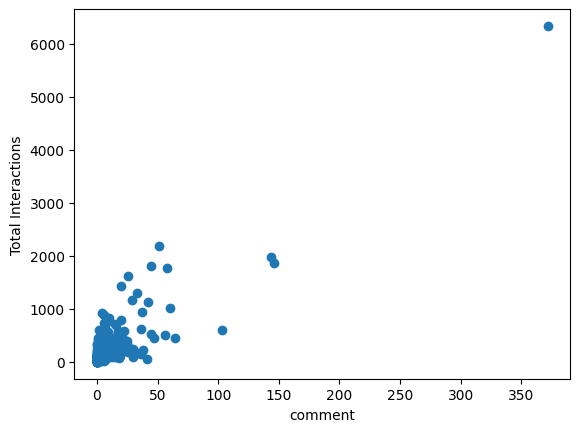

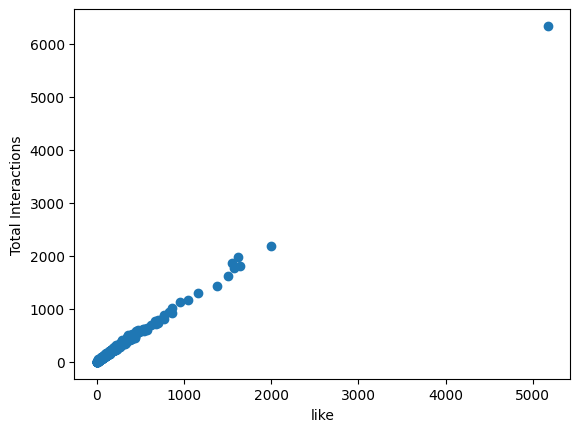

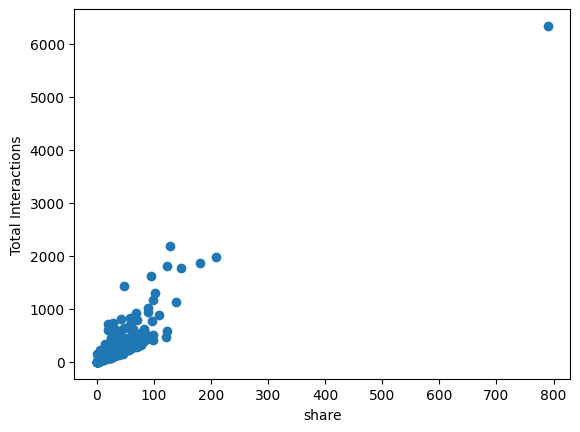

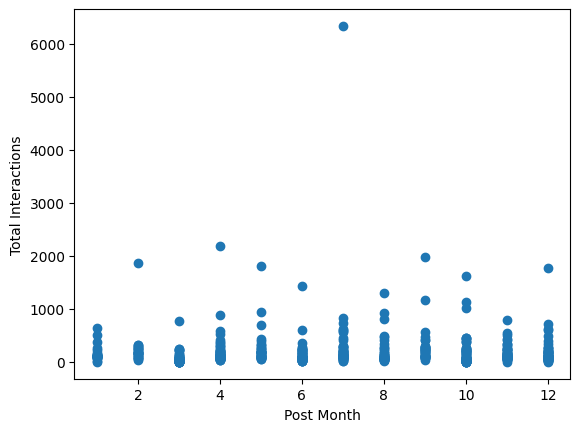

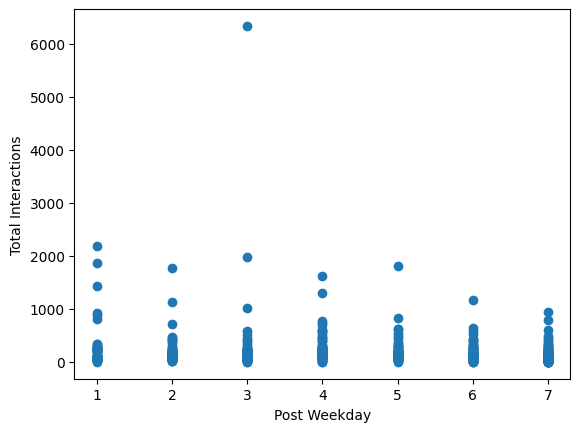

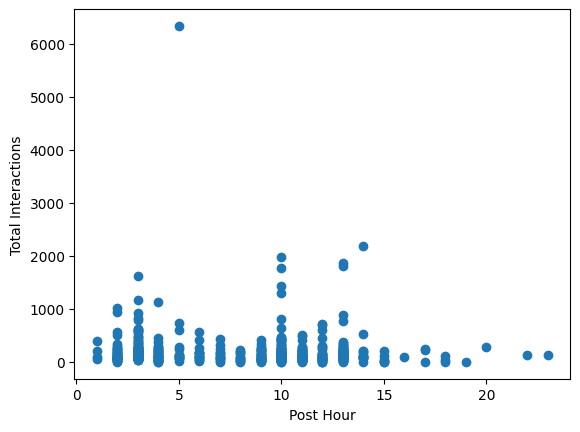

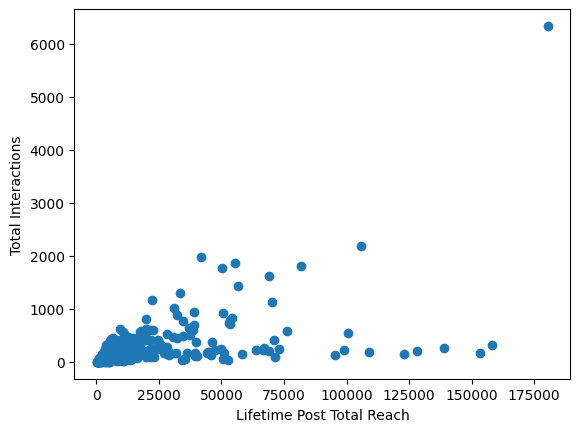

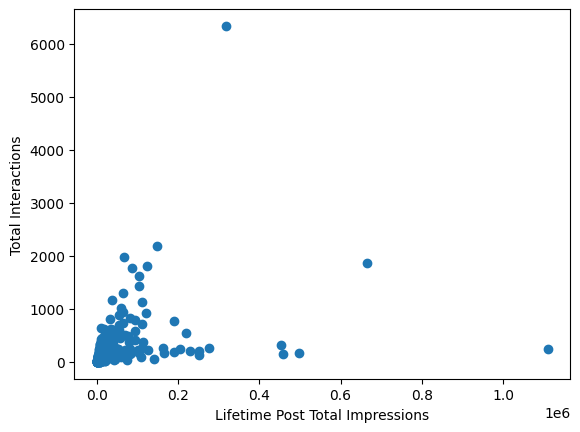

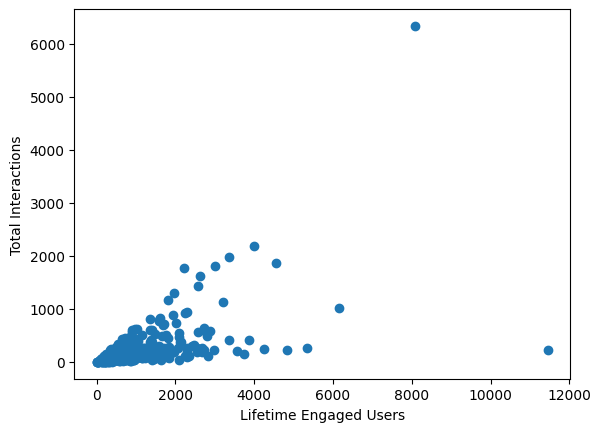

In [9]:
x = ["comment", "like", "share", "Post Month", "Post Weekday", "Post Hour", "Lifetime Post Total Reach", "Lifetime Post Total Impressions", "Lifetime Engaged Users"]
y = "Total Interactions"
for a in x:
  plt.scatter(Fb[a], Fb[y])
  plt.xlabel(a)
  plt.ylabel(y)
  plt.show()

It is clear that shares and likes have the most direct positive trend on total interactions. Comments also have a somewhat positive trend, but not as drastic as the prior two. I can assume this is because you are more likely to comment on a friend's post who you already interact with, not every single new person you might see on your feed. On the other hand, it is common to like and share many people's posts, even if you do not know them well. It also is clear that post month, weekday, and hour don't have a huge effect on the total interactions. If any, hour has more of an effect, but this can be assumed to happen because most people aren't awake at the dead of night, or they might be on social media during their lunch break or a time when people are typically on screens.

So, I will be making my first model with likes and Total Interactions. I will be scaling the data and then making the non-linear model.

In [10]:
#convert to a PyTorch tensor
#convert to a PyTorch tensor
l = Fb.like.to_numpy()
like = torch.from_numpy(l)
TI = Fb["Total Interactions"].to_numpy()
TI = torch.from_numpy(TI)

In [11]:
X = like.unsqueeze(dim=1) #use height(like) as a predictor
y = TI.unsqueeze(dim=1) #weight is the estimand, the thing we're predicting.

In [12]:
# Scale the height(like) using standardization
scaler = StandardScaler()
like_scaled = scaler.fit_transform(
    like.reshape(-1, 1) #makes it a column vector
    )

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    like_scaled, TI, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

<ipython-input-12-de84de8b0320>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-12-de84de8b0320>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32)


In [13]:
# Scale the Total Interactions using standardization
scaler = StandardScaler()
TI_scaled = scaler.fit_transform(
    TI.reshape(-1, 1) #makes it a column vector
    )

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    TI_scaled, l, test_size=0.2,
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [14]:
# Two layer nn with nn.Sequential
model_0 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=1, out_features=7),

    nn.RReLU(), #this will make our nn more like BART,
    #except with diagonal lines instead of veritcal lines

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

In [15]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

In [16]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_0.train()

    # 1. Forward pass; makes predictions
    y_pred = model_0(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_0.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_0(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([99])) that is different to the input size (torch.Size([99, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 158188.51562, Test loss: 53265.66016
Epoch: 200 | Train loss: 491.59601, Test loss: 57687.68359
Epoch: 400 | Train loss: 492.01230, Test loss: 57698.60156
Epoch: 600 | Train loss: 490.90891, Test loss: 57711.37500
Epoch: 800 | Train loss: 490.00610, Test loss: 57721.12500
Epoch: 1000 | Train loss: 489.92270, Test loss: 57730.67578
Epoch: 1200 | Train loss: 490.48639, Test loss: 57739.25781
Epoch: 1400 | Train loss: 489.64673, Test loss: 57747.22266
Epoch: 1600 | Train loss: 489.95883, Test loss: 57753.79297
Epoch: 1800 | Train loss: 489.00360, Test loss: 57759.89062


In [17]:
# Turn on evaluation mode
model_0.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_0(X_test)

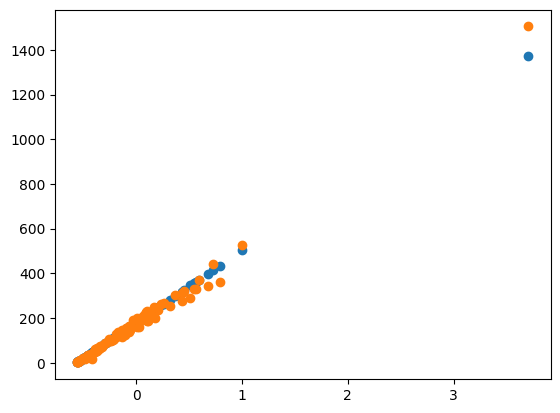

In [18]:
plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())
plt.scatter(X_test.detach().numpy(),y_test)

This graph is pretty good, but it was a very simple task that I was asking the data to complete. However, the points line up and the positive trend is very clear. Because I want to test out a more complicated relationship, I will continue to make another model, this time with likes and shares

In [19]:
LS = Fb[["like","share"]]

In [20]:
LS

,like,share
0,79.0,17.0
1,130.0,29.0
2,66.0,14.0
3,1572.0,147.0
4,325.0,49.0
...,...,...
494,125.0,41.0
495,53.0,26.0
496,53.0,22.0
497,93.0,18.0


In [21]:
#convert to a PyTorch tensor
#convert to a PyTorch tensor
LS = Fb[["like","share"]].to_numpy()
LS = torch.from_numpy(LS)
TI = Fb["Total Interactions"].to_numpy()
TI = torch.from_numpy(TI)

In [22]:
X = LS.unsqueeze(dim=1) #use height(like) as a predictor
y = TI.unsqueeze(dim=1) #weight is the estimand, the thing we're predicting.

In [63]:
# Scale the LS tensor (like and share) using standardization
scaler = StandardScaler()
LS_scaled = scaler.fit_transform(LS) # LS already has the correct shape for StandardScaler

# Scale the Total Interactions using standardization
scaler_y = StandardScaler() # Use a different scaler for the target variable
TI_scaled = scaler_y.fit_transform(TI.reshape(-1, 1))

# Split data into training and testing sets
# Use LS_scaled as the input features (X) and TI_scaled as the target (y)
X_train, X_test, y_train, y_test = train_test_split(
    LS_scaled, TI_scaled, test_size=0.2, random_state=42 # Added random_state for reproducibility
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [75]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001) #this is how fast it optimizes; smaller is slower, but more consistent

Epoch: 0 | Train loss: 1.70941, Test loss: 1.09268
Epoch: 200 | Train loss: 1.55699, Test loss: 0.98031
Epoch: 400 | Train loss: 1.35212, Test loss: 0.88127
Epoch: 600 | Train loss: 1.19935, Test loss: 0.79353
Epoch: 800 | Train loss: 1.05857, Test loss: 0.71537
Epoch: 1000 | Train loss: 0.95908, Test loss: 0.64509
Epoch: 1200 | Train loss: 0.89049, Test loss: 0.58166
Epoch: 1400 | Train loss: 0.78277, Test loss: 0.52440
Epoch: 1600 | Train loss: 0.68838, Test loss: 0.47255
Epoch: 1800 | Train loss: 0.61451, Test loss: 0.42554


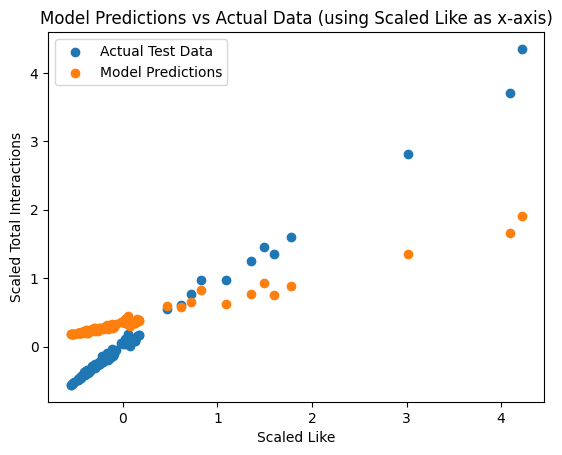

In [77]:
# Two layer nn with nn.Sequential
model_0 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=2, out_features=7),

    nn.RReLU(),

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001)

# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_0.train()

    # 1. Forward pass; makes predictions
    y_pred = model_0(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train) # Removed .squeeze() from y_pred

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_0.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_0(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

# Turn on evaluation mode
model_0.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_0(X_test)

# Plot the actual test data
plt.scatter(X_test[:, 0].detach().numpy(), y_test.detach().numpy(), label='Actual Test Data') # Plot against the first feature of X_test

plt.scatter(X_test[:, 0].detach().numpy(), y_preds.detach().numpy(), label='Model Predictions') # y_preds will now have the correct shape

plt.xlabel('Scaled Like')
plt.ylabel('Scaled Total Interactions')
plt.title('Model Predictions vs Actual Data (using Scaled Like as x-axis)')
plt.legend()
plt.show()

This model shows the relationship relatively well, however the model predictions is not capturing the steepness of the actual test data. It shows a pretty flat trend, but it is not declining, which kept happening in my previous attempts. There could be underfitting, but the model could also be not so great because I am only using scaled like and scaled TI, which means comments and other factors won't be involved. Overall, I think this model is pretty good, but it could definitely be better.

Epoch: 0 | Train loss: 0.78192, Test loss: 0.44979
Epoch: 200 | Train loss: 0.64788, Test loss: 0.38368
Epoch: 400 | Train loss: 0.53288, Test loss: 0.32753
Epoch: 600 | Train loss: 0.43163, Test loss: 0.27984
Epoch: 800 | Train loss: 0.35367, Test loss: 0.23945
Epoch: 1000 | Train loss: 0.28567, Test loss: 0.20538
Epoch: 1200 | Train loss: 0.23776, Test loss: 0.17674
Epoch: 1400 | Train loss: 0.18962, Test loss: 0.15276
Epoch: 1600 | Train loss: 0.16134, Test loss: 0.13281
Epoch: 1800 | Train loss: 0.12961, Test loss: 0.11623


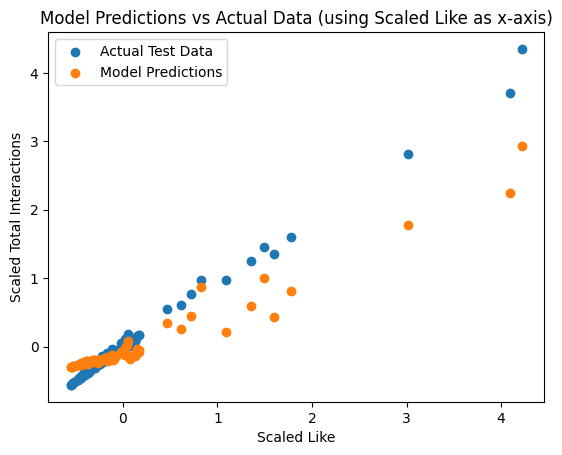

In [78]:
# Two layer nn with nn.Sequential
model_0 = nn.Sequential(
    #out_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=2, out_features=7),

    nn.RReLU(),

    #in_features is 7, for 7 nodes/neurons/knots
    nn.Linear(in_features=7, out_features=1),
)

# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.0001)

# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_0.train()

    # 1. Forward pass; makes predictions
    y_pred = model_0(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_0.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_0(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 200 == 0: #prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

# Turn on evaluation mode
model_0.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_0(X_test)

# Plot the actual test data
plt.scatter(X_test[:, 0].detach().numpy(), y_test.detach().numpy(), label='Actual Test Data') # Plot against the first feature of X_test

plt.scatter(X_test[:, 0].detach().numpy(), y_preds.detach().numpy(), label='Model Predictions') # y_preds will now have the correct shape

plt.xlabel('Scaled Like')
plt.ylabel('Scaled Total Interactions')
plt.title('Model Predictions vs Actual Data (using Scaled Like as x-axis)')
plt.legend()
plt.show()

This model shows a much better pattern. The data points do a better job of following the steepness and the trend of the actual test data. However, the only difference in the code is the order it is run in, which means the order could be the only thing that matters and could be affecting the model. Both models use the scaled data, but the 2nd model captures the trend better.

##Conclusion
The final 2 models show a more complicated trend than the 1st model, which looks great, but is very simple. This shows it is more difficult for the computer to run the more complicated models. Ultimately, this shows that likes and shares have a direct correlation to the total interactions. This is not shocking to me and is pretty cool because it matches my hypothesis. I am pretty proud of these models because, while the unit was very hard, the models show some great trends.